In [1]:
import pickle

import numpy as np

import matplotlib.pyplot as plt

In [6]:
"""
'this file check and convert the pose data'
'-----------------'
0'Right Ankle', 3
1'Right Knee', 2
2'Right Hip', 1
3'Left Hip', 4
4'Left Knee', 5
5'Left Ankle', 6
6'Right Wrist', 15
7'Right Elbow', 14
8'Right Shoulder', 13
9'Left Shoulder', 10
10'Left Elbow', 11
11'Left Wrist', 12
12'Neck', 8 
13'Top of Head', 9
14'Pelvis)', 0
15'Thorax', 7 
16'Spine', mpi3d
17'Jaw', mpi3d
18'Head', mpi3d

mpi3dval: reorder = [14,2,1,0,3,4,5,16,12,18,9,10,11,8,7,6]
"""

"\n'this file check the 2D pose data'\n'-----------------'\n0'Right Ankle', 3\n1'Right Knee', 2\n2'Right Hip', 1\n3'Left Hip', 4\n4'Left Knee', 5\n5'Left Ankle', 6\n6'Right Wrist', 15\n7'Right Elbow', 14\n8'Right Shoulder', 13\n9'Left Shoulder', 10\n10'Left Elbow', 11\n11'Left Wrist', 12\n12'Neck', 8 \n13'Top of Head', 9\n14'Pelvis)', 0\n15'Thorax', 7 \n16'Spine', mpi3d\n17'Jaw', mpi3d\n18'Head', mpi3d\n\nmpi3dval: reorder = [14,2,1,0,3,4,5,16,12,18,9,10,11,8,7,6]\n"

In [2]:
import matplotlib.pyplot as plt

def show2Dpose(channels, ax, lcolor="#3498db", rcolor="#e74c3c", add_labels=True):
    """
    Visualize a 2d skeleton

    Args
    channels: 64x1 vector. The pose to plot.
    ax: matplotlib axis to draw on
    lcolor: color for left part of the body
    rcolor: color for right part of the body
    add_labels: whether to add coordinate labels
    Returns
    Nothing. Draws on ax.
    """
    vals = np.reshape( channels, (-1, 2) )
    #plt.plot(vals[:,0], vals[:,1], 'ro')
    I  = np.array([0,1,2,0,4,5,0,7,8,8,10,11,8,13,14]) # start points
    J  = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) # end points
    LR = np.array([1,1,1,0,0,0,0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=bool)

    # Make connection matrix
    for i in np.arange( len(I) ):
        x, y = [np.array( [vals[I[i], j], vals[J[i], j]] ) for j in range(2)]
        ax.plot(x, -y, lw=2, c=lcolor if LR[i] else rcolor)

    RADIUS = 1 # space around the subject
    xroot, yroot = vals[0,0], vals[0,1]
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    
    if add_labels:
        ax.set_xlabel("x")
        ax.set_ylabel("-y")

    ax.set_aspect('equal')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

def show3Dpose(channels, ax, lcolor="#3498db", rcolor="#e74c3c", add_labels=True,
               gt=False,pred=False): # blue, orange
    """
    Visualize a 3d skeleton

    Args
    channels: 96x1 vector. The pose to plot.
    ax: matplotlib 3d axis to draw on
    lcolor: color for left part of the body
    rcolor: color for right part of the body
    add_labels: whether to add coordinate labels
    Returns
    Nothing. Draws on ax.
    """

    #   assert channels.size == len(data_utils.H36M_NAMES)*3, "channels should have 96 entries, it has %d instead" % channels.size
    vals = np.reshape( channels, (16, -1) )

    I  = np.array([0,1,2,0,4,5,0,7,8,8,10,11,8,13,14]) # start points
    J  = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]) # end points
    LR  = np.array([1,1,1,0,0,0,0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=bool)

    # Make connection matrix
    for i in np.arange( len(I) ):
        x, y, z = [np.array( [vals[I[i], j], vals[J[i], j]] ) for j in range(3)]
        if gt:
            ax.plot(x,z, -y,  lw=2, c='k')
        elif pred:
            ax.plot(x,z, -y,  lw=2, c='r')
        else:
            ax.plot(x, z, -y,  lw=2, c=lcolor if LR[i] else rcolor)

    RADIUS = 1 # space around the subject
    xroot, yroot, zroot = vals[0,0], vals[0,1], vals[0,2]
    ax.set_xlim3d([-RADIUS+xroot, RADIUS+xroot])
    ax.set_ylim3d([-RADIUS+zroot, RADIUS+zroot])
    ax.set_zlim3d([-RADIUS-yroot, RADIUS-yroot])


    if add_labels:
        ax.set_xlabel("x")
        ax.set_ylabel("z")
        ax.set_zlabel("-y")

    # Get rid of the panes (actually, make them white)
    white = (1.0, 1.0, 1.0, 0.0)
    ax.w_xaxis.set_pane_color(white)
    ax.w_yaxis.set_pane_color(white)
    # Keep z pane

    # Get rid of the lines in 3d
    ax.w_xaxis.line.set_color(white)
    ax.w_yaxis.line.set_color(white)
    ax.w_zaxis.line.set_color(white)

In [7]:
'''deal with mpi3dval'''

'deal with mpi3dval'

In [8]:
# load the download data

mpi3dval_path = './dataset_extras/mpi_inf_3dhp_valid.npz'
mpi_inf_3dhp_valid = np.load(mpi3dval_path)
print(mpi_inf_3dhp_valid.files)

['imgname', 'center', 'scale', 'part', 'S']


In [9]:
# convert the data to a list to processing.

mpi3d_val_list = []
for i in range(2929):
    tmp_dict = {}
    tmp_dict['filename'] = mpi_inf_3dhp_valid['imgname'][i]
    tmp_dict['kpts2d'] = mpi_inf_3dhp_valid['part'][i]    
    tmp_dict['kpts3d'] = mpi_inf_3dhp_valid['S'][i] 
    
    # prepare the image width for 2D keypoint normalization.
    if '/TS5/' in tmp_dict['filename']:
        tmp_dict['width'] = 1920
        tmp_dict['height'] = 1080
    elif '/TS6/' in tmp_dict['filename']:
        tmp_dict['width'] = 1920
        tmp_dict['height'] = 1080
    else:
        tmp_dict['width'] = 2048
        tmp_dict['height'] = 2048
    
    mpi3d_val_list.append(tmp_dict)
    


In [10]:

def normalize_screen_coordinates(X,mask, w, h):
    assert X.shape[-1] == 2

    # Normalize so that [0, w] is mapped to [-1, 1], while preserving the aspect ratio
    return (X / w * 2 - [1, h / w] ) * mask

def get_2d_pose_reorderednormed(source):
    reorder = [14,2,1,0,3,4,5,16,12,18,9,10,11,8,7,6]
    tmp_array = source['kpts2d'][reorder][:, :2]
    mask = source['kpts2d'][reorder][:, 2:]
    tmp_array1 = normalize_screen_coordinates(tmp_array, mask, source['width'], source['height'])
    return tmp_array1, mask

def get_3d_pose_reordered(source):
    reorder = [14,2,1,0,3,4,5,16,12,18,9,10,11,8,7,6]
    tmp_array = source['kpts3d'][reorder][:, :3]
    mask = source['kpts3d'][reorder][:, 3:]
    return tmp_array, mask

In [11]:
# convert the pose to 16 joints and put into array

mpi3d_mask_check = []
mpi3d_data_2dpose = []
mpi3d_data_3dpose = []

for source in mpi3d_val_list:
    tmp2d, tmp_2dmask = get_2d_pose_reorderednormed(source)
    tmp3d, tmp_3dmask = get_3d_pose_reordered(source)
    assert np.sum(np.abs(tmp_2dmask - tmp_3dmask))== 0
#     mask_check.append(tmp_2dmask)

    if not np.sum(tmp_2dmask) == (len(tmp_2dmask)):
        mpi3d_mask_check.append(tmp_2dmask)
        
    mpi3d_data_2dpose.append(tmp2d)
    mpi3d_data_3dpose.append(tmp3d)

mpi3d_data_2dpose = np.array(mpi3d_data_2dpose)  
mpi3d_data_3dpose = np.array(mpi3d_data_3dpose)  

In [12]:
len(mpi3d_mask_check)

0

In [13]:
# save the npz for test purpose

print(mpi3d_data_3dpose.shape)
print(mpi3d_data_2dpose.shape)
np.savez('./test_set/test_3dhp.npz',pose3d=mpi3d_data_3dpose,pose2d=mpi3d_data_2dpose)

(2929, 16, 3)
(2929, 16, 2)


In [16]:
# load and check
mpi3d_npz = np.load('./test_set/test_3dhp.npz')

In [17]:
np.concatenate([mpi3d_npz['pose2d']]).shape

(2929, 16, 2)

In [23]:
# show some pose from self defined idx
idx = 1200 

In [24]:
mpi3d_val_list[idx]['filename']

'mpi_inf_3dhp_test_set/TS3/imageSequence/img_000751.jpg'

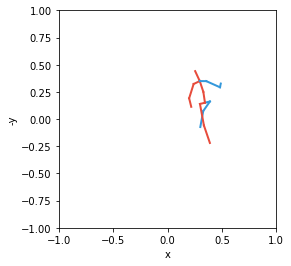

In [25]:
vals2d = mpi3d_data_2dpose[idx]
ax2d = plt.axes()
show2Dpose(vals2d, ax2d)
plt.show()

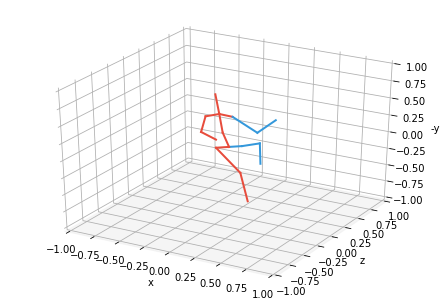

In [26]:
vals3d = mpi3d_data_3dpose[idx]
fig3d = plt.figure()
# ax = fig.add_subplot(1, 1, 1, projection='3d')
ax3d = Axes3D(fig3d)
show3Dpose(vals3d, ax3d)
plt.show()